# Question 1: Extracting Tesla Stock Data Using yfinance

In [3]:
# Import the yfinance library to download stock data
import yfinance as yf

# Import pandas for data manipulation and handling
import pandas as pd

# Download Tesla stock data using the Ticker object for Tesla (TSLA)
tesla_stock_data = yf.Ticker('TSLA')

# Extract the historical stock price data for Tesla for the maximum available period
tesla_history = tesla_stock_data.history(period="max")

# Reset the index of the dataframe to have a default integer index
tesla_history_reset = tesla_history.reset_index()

# Display the first five rows of the Tesla stock data using the head() function
tesla_history_reset.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


# Question 2 - Extracting Tesla Revenue Data Using Webscraping

In [28]:
# Import necessary libraries for web scraping and data handling
import pandas as pd
from bs4 import BeautifulSoup
import requests  # For sending HTTP requests

# Set the fake user-agent to mimic a browser request
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
}

# URL of the webpage containing Tesla's revenue data
url = 'https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue'

# Send an HTTP request to the webpage with the fake user-agent header
response = requests.get(url, headers=headers)

# Check if the request was successful (status code 200 means success)
if response.status_code == 200:
    # Parse the HTML data using BeautifulSoup
    soup = BeautifulSoup(response.text, 'html.parser')

    # Find the table containing Tesla's quarterly revenue data
    tables = soup.find_all("table", {"class": "historical_data_table table"})

    # Extract rows of the quarterly revenue table
    revenue_data = []
    rows = tables[1].find_all('tr')[1:]  # Skip the header row; tables[1] should have the quarterly data

    # Loop through each row and extract the date and revenue values
    for row in rows:
        cols = row.find_all('td')
        date = cols[0].text.strip()  # Extract the date
        revenue = cols[1].text.strip().replace('$', '').replace(',', '')  # Extract and clean the revenue
        revenue_data.append([date, revenue])

    # Convert the extracted data into a pandas DataFrame
    tesla_revenue_df = pd.DataFrame(revenue_data, columns=["Date", "Revenue"])

    # Clean the data by removing any rows where revenue is missing
    tesla_revenue_df = tesla_revenue_df[tesla_revenue_df['Revenue'] != '']

    # Display the last five rows of the Tesla revenue data using the tail() function
    print(tesla_revenue_df.tail())
else:
    # If the request failed, print the status code and error message
    print(f"Failed to retrieve the webpage. Status code: {response.status_code}")


          Date Revenue
55  2010-09-30      31
56  2010-06-30      28
57  2010-03-31      21
59  2009-09-30      46
60  2009-06-30      27


# Question 3 - Extracting GameStop Stock Data Using yfinance

In [29]:
# Import the yfinance library for downloading stock data
import yfinance as yf

# Import pandas for data handling
import pandas as pd

# Download GameStop stock data using yfinance's Ticker object for GME
gme_stock_data = yf.Ticker("GME")

# Extract the historical stock price data for GameStop (GME) for the maximum available period
gme_history = gme_stock_data.history(period="max")

# Reset the index to have a default integer index, as required
gme_history_reset = gme_history.reset_index()

# Save the resulting DataFrame to a CSV file (optional step, can be commented out if not needed)
# gme_history_reset.to_csv('gme_stock_data.csv', index=False)

# Display the first five rows of the DataFrame to verify the data
gme_history_reset.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683251,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


# Question 4 - Extracting GameStop Revenue Data Using Webscraping

In [30]:
# Import necessary libraries for web scraping and data handling
import pandas as pd
from bs4 import BeautifulSoup
import requests

# Set the fake user-agent to mimic a browser request
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
}

# URL of the webpage containing GameStop's revenue data
url = 'https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue'

# Send an HTTP request to the webpage with the fake user-agent header
response = requests.get(url, headers=headers)

# Check if the request was successful (status code 200 means success)
if response.status_code == 200:
    # Parse the HTML data using BeautifulSoup
    soup = BeautifulSoup(response.text, 'html.parser')

    # Find the table containing GameStop's quarterly revenue data
    tables = soup.find_all("table", {"class": "historical_data_table table"})

    # Extract rows of the quarterly revenue table
    revenue_data = []
    rows = tables[1].find_all('tr')[1:]  # Skip the header row; tables[1] should have the quarterly data

    # Loop through each row and extract the date and revenue values
    for row in rows:
        cols = row.find_all('td')
        date = cols[0].text.strip()  # Extract the date
        revenue = cols[1].text.strip().replace('$', '').replace(',', '')  # Extract and clean the revenue
        revenue_data.append([date, revenue])

    # Convert the extracted data into a pandas DataFrame
    gme_revenue_df = pd.DataFrame(revenue_data, columns=["Date", "Revenue"])

    # Clean the data by removing any rows where revenue is missing
    gme_revenue_df = gme_revenue_df[gme_revenue_df['Revenue'] != '']

    # Display the last five rows of the GameStop revenue data using the tail() function
    print(gme_revenue_df.tail())

else:
    # If the request failed, print the status code and error message
    print(f"Failed to retrieve the webpage. Status code: {response.status_code}")


          Date Revenue
58  2010-01-31    3524
59  2009-10-31    1835
60  2009-07-31    1739
61  2009-04-30    1981
62  2009-01-31    3492


## Function make_graph for the dashboards

In [31]:
# Import necessary libraries for data visualization
import matplotlib.pyplot as plt
import pandas as pd

# Common function to plot stock and revenue data
def make_graph(stock_data, revenue_data, stock_label, revenue_label, title):
    """
    Function to create a graph with two y-axes: one for stock price and one for revenue.
    Arguments:
    stock_data -- DataFrame containing stock price data with 'Date' and 'Close' columns.
    revenue_data -- DataFrame containing revenue data with 'Date' and 'Revenue' columns.
    stock_label -- Label for the stock price axis.
    revenue_label -- Label for the revenue axis.
    title -- Title of the graph.
    """
    # Create a figure with two y-axes
    fig, ax1 = plt.subplots(figsize=(10,6))

    # Plot stock price on the first y-axis
    ax1.set_xlabel('Date')
    ax1.set_ylabel(stock_label, color='tab:red')
    ax1.plot(stock_data['Date'], stock_data['Close'], color='tab:red', label=stock_label)
    ax1.tick_params(axis='y', labelcolor='tab:red')

    # Create a second y-axis for revenue data
    ax2 = ax1.twinx()
    ax2.set_ylabel(revenue_label, color='tab:blue')
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'].astype(float), color='tab:blue', label=revenue_label)
    ax2.tick_params(axis='y', labelcolor='tab:blue')

    # Add a title to the graph
    plt.title(title)

    # Show the graph
    plt.show()


# Question 5 - Tesla Stock and Revenue Dashboard

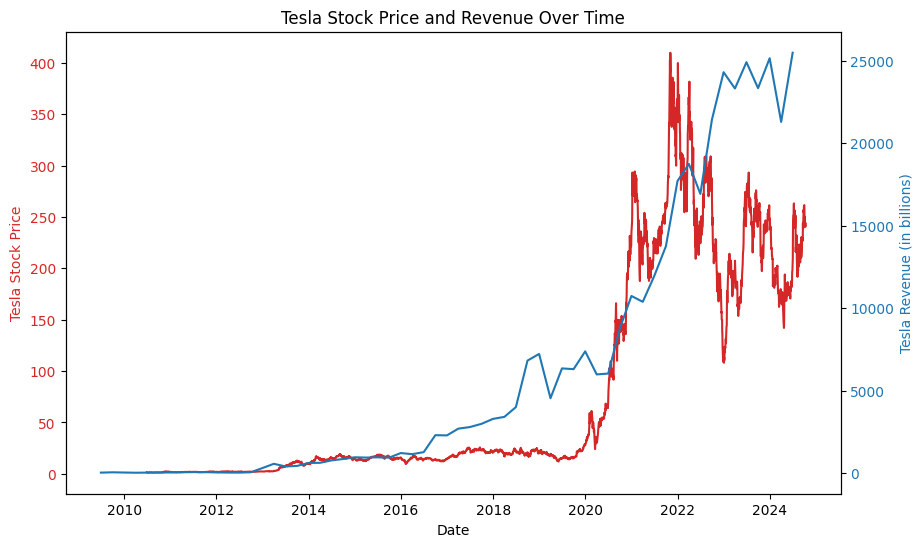

In [32]:
# Assume tesla_history_reset and tesla_revenue_df are already prepared from previous steps
# Format the Date column to ensure correct plotting
tesla_history_reset['Date'] = pd.to_datetime(tesla_history_reset['Date'])
tesla_revenue_df['Date'] = pd.to_datetime(tesla_revenue_df['Date'])

# Plot Tesla Stock and Revenue using the make_graph function
make_graph(tesla_history_reset, tesla_revenue_df,
           stock_label="Tesla Stock Price",
           revenue_label="Tesla Revenue (in billions)",
           title="Tesla Stock Price and Revenue Over Time")


# Question 6 - GameStop Stock and Revenue Dashboard

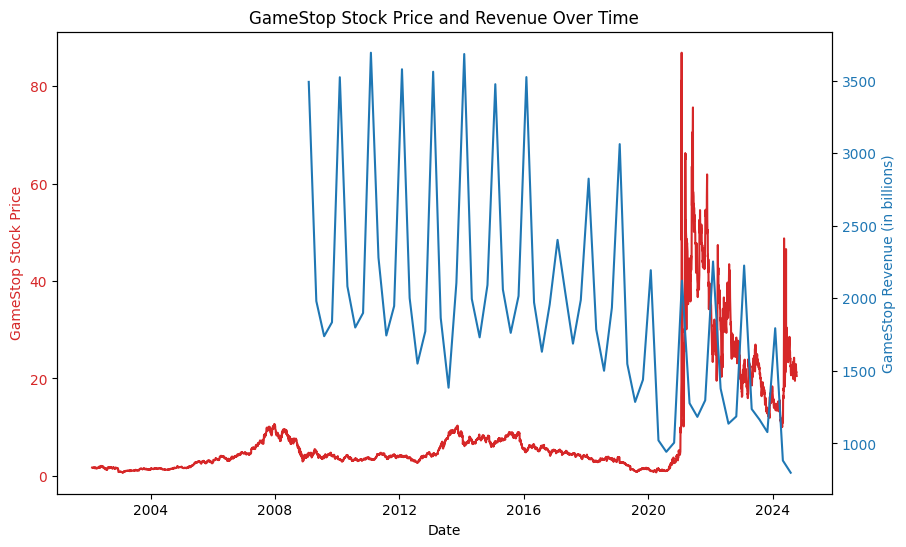

In [33]:
# Assume gme_history_reset and gme_revenue_df are already prepared from previous steps
# Format the Date column to ensure correct plotting
gme_history_reset['Date'] = pd.to_datetime(gme_history_reset['Date'])
gme_revenue_df['Date'] = pd.to_datetime(gme_revenue_df['Date'])

# Plot GameStop Stock and Revenue using the make_graph function
make_graph(gme_history_reset, gme_revenue_df,
           stock_label="GameStop Stock Price",
           revenue_label="GameStop Revenue (in billions)",
           title="GameStop Stock Price and Revenue Over Time")
